In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from collections import defaultdict   

$\Large{\textbf{Greeks}}$ 

The greeks are partial derivatives of the option price which are used to quantify the risks as well as returns of the options.
The most commonly used greeks are (https://en.wikipedia.org/wiki/Greeks_(finance))

$\textbf{Delta}: \:  \Delta=\frac{\partial f}{\partial S},\: \textbf{Gamma}: \: \Gamma=\frac{\partial^2 f}{\partial S^2},\: \textbf{Theta}: \: \Theta = \frac{\partial f}{\partial t},\: \textbf{Rho}: \: \rho= \frac{\partial f}{\partial r},\: \textbf{Vega}: \: \nu= \frac{\partial f}{\partial \sigma}$ 






For a $\textbf{call}$ option, these are given by 

$\Delta = e^{-y \: T} \: N(d_1)$

$\Theta = - \frac{S \: e^{-y \: T} \:\sigma \: N(d_1)}{2 \sqrt{T}} + y \: S \: e^{-y \: T}\:N(d_1) - r \: K \: e^{-r \: T} N(d_2) $

$\rho = K \: T \: e^{- r \: T} N(d_2)$ 

$\gamma = \frac{ e^{-y \: T} \: N(d_1)}{ S \: \sigma \: \sqrt{T}} $

$\nu =  e^{-y \: T}  S \: \sqrt{T} \: N(d_1) $

For a $\textbf{put}$ option, these are given by 

$\Delta = -e^{-y \: T} \: N(-d_1)$

$\Theta = - \frac{S \: e^{-y \: T} \:\sigma \: N(d_1)}{2 \sqrt{T}} -  y \: S \: e^{-y \: T}\:N(-d_1) + r \: K \: e^{-r \: T} N(-d_2) $

$\rho = - K \: T \: e^{- r \: T} N(-d_2)$ 

$\gamma = \frac{ e^{-y \: T} \: N(d_1)}{ S \: \sigma \: \sqrt{T}} $

$\nu =  e^{-y \: T}  S \: \sqrt{T} \: N(d_1) $

In [192]:
def greeks_computation(S, K, T, r, y, sigma, option):

    d1=(np.log(S /K) + (r-y + 0.5*sigma**2)*(T))/(sigma*np.sqrt(T))
    
    d2=d1- sigma * np.sqrt(T)
    
    if option=="Call":
        
        price = S * np.exp(-y * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        
        delta = np.exp(-y * T) * norm.cdf(d1)

        theta = -(S * np.exp(-y * T) * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + y * S * np.exp(-y * T) * norm.cdf(d1) - r * K * np.exp(-r * T) * norm.cdf(d2)

        rho = K * T * np.exp(-r * T) * norm.cdf(d2) 
    
    else:

        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-y * T) * norm.cdf(-d1)
        
        delta = np.exp(-y * T) * norm.cdf(-d1)

        theta = -(S * np.exp(-y * T) * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - y * S * np.exp(-y * T) * norm.cdf(-d1) + r * K * np.exp(-r * T) * norm.cdf(-d2)

        rho = - K * T * np.exp(-r * T) * norm.cdf(-d2) 
        
        
    gamma = (np.exp(-y * T) * norm.pdf(d1) / (S * sigma * np.sqrt(T)))

    vega = S * np.exp(-y * T) * norm.pdf(d1) * np.sqrt(T)

    print(price, delta, theta, rho, gamma, vega)

    return price, delta, theta, rho, gamma, vega 

Below is a function to plot the greek's for european calls as a function of the stock price.  

In [313]:
def greeks_2D_plots(K, T, r, y, sigma, option):

    print("*"*100)
    print(f'Greeks for the {option} option as a function of the Stock Price')
    print("*"*100)
    
    fig = plt.figure(figsize=(15, 15))
    
    S_range = np.linspace(70, 130, 50)
    
    greeks = defaultdict(list)
   
    for i in range(len(S_range)):
            
        price, delta, theta, rho, gamma, vega  = greeks_computation(S_range[i], K, T, r, y, sigma, option)
            
        greeks['Delta'].append(delta)
        greeks['Gamma * 100'].append(gamma*100)
        greeks['Vega'].append(vega)
        greeks['Theta'].append(theta)
        greeks['Rho'].append(rho)

    for idx, (greek_name, greek_values) in enumerate(greeks.items(), 1):
        
        ax = fig.add_subplot(3, 2, idx)
        function = ax.plot(S_range, greek_values)
        ax.set_xlabel('Stock Price ($)', fontsize=12)
        ax.set_ylabel(f'{greek_name}', fontsize=12)
        ax.set_title(f'{option} Option {greek_name}',{'color':'green'})
    
    fig.subplots_adjust(hspace=0.4, wspace=0.3, top=0.8, bottom=0.1, left=0.1, right=0.7)   
    plt.show()

****************************************************************************************************
Greeks for the Put option as a function of the Stock Price
****************************************************************************************************


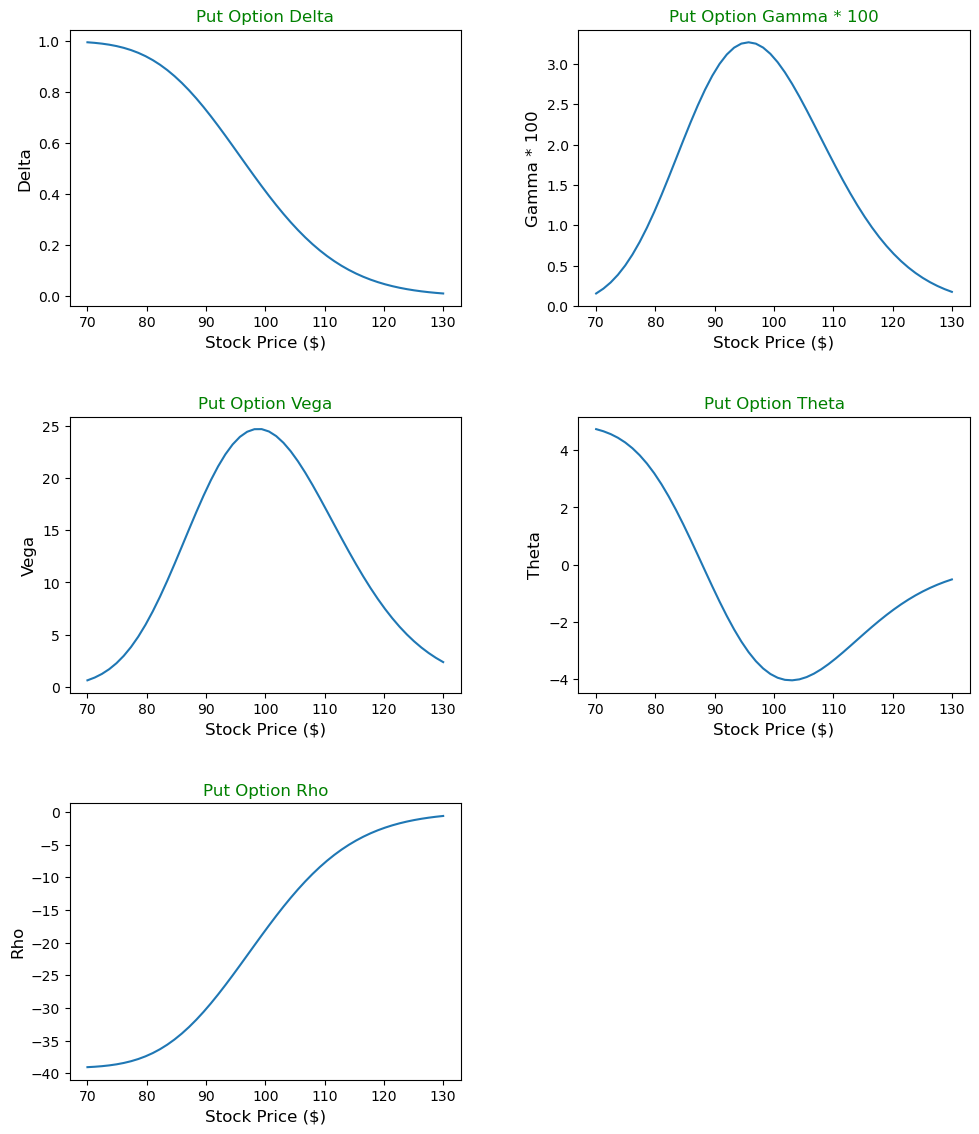

In [317]:
greeks_2D_plots(K=100, T=0.4, r=0.05, y=0, sigma=0.2, option="Put")

****************************************************************************************************
Greeks for the Call option as a function of the Stock Price
****************************************************************************************************


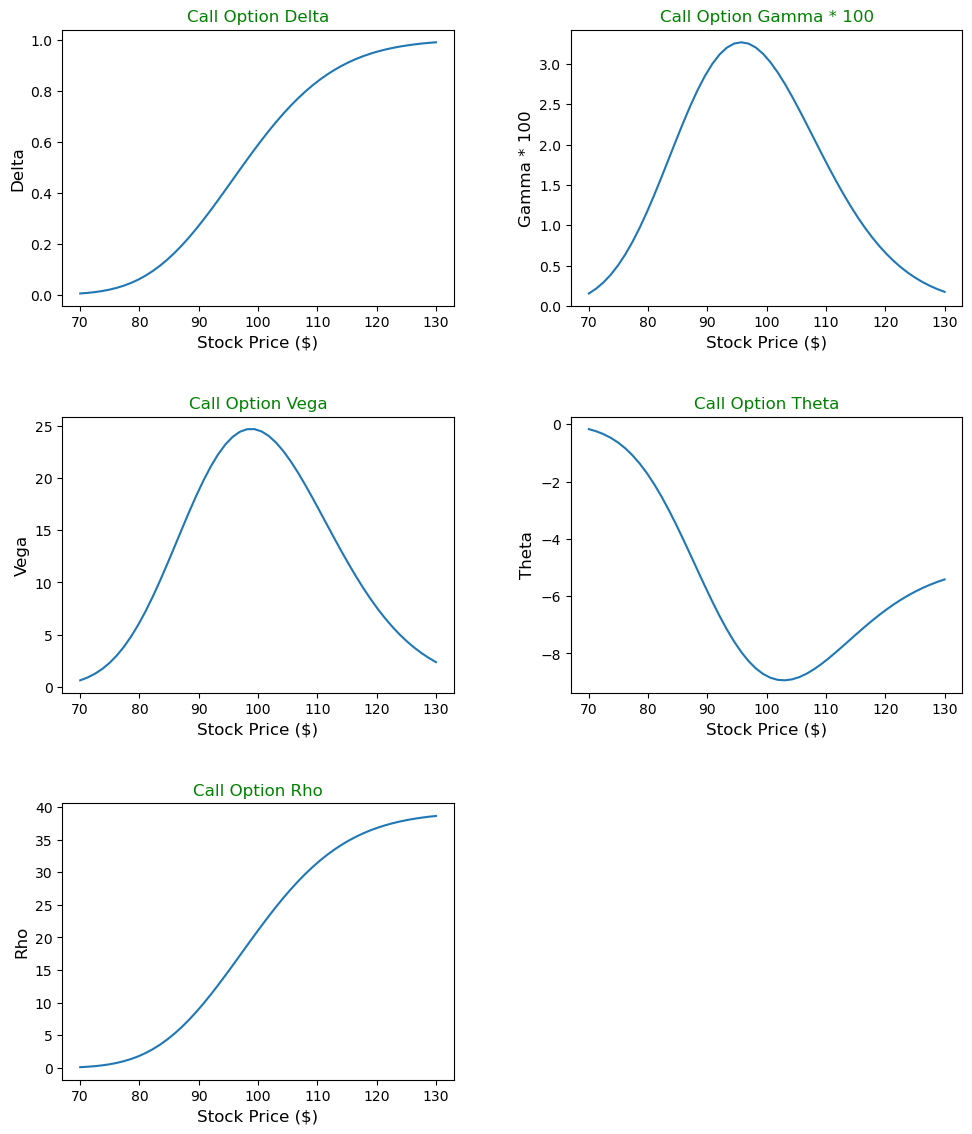

In [315]:
greeks_2D_plots(K=100, T=0.4, r=0.05, y=0, sigma=0.2, option="Call")

Below is a function to plot the greek's for european calls as a function of the stock price and volatility.

In [319]:
def greeks_3D_plots(K, T, r, y, option):

    print("*"*100)
    print(f'Greeks for the {option} option as a function of the Stock Price and Volatility')
    print("*"*100)
    
    fig = plt.figure(figsize=(17, 15))
    

    S_range = np.linspace(70, 130, 50)
    sigma_range = np.linspace(0.1, 0.4, 50)
    S_mesh, sigma_mesh = np.meshgrid(S_range, sigma_range)
    
    greeks = defaultdict(list)
    
    for i in range(len(sigma_range)):
        for j in range(len(S_range)):
            
            price, delta, theta, rho, gamma, vega  = greeks_computation(S_mesh[i,j], K, T, r, y, sigma_mesh[i,j], option)
            
            greeks['Delta'].append(delta)
            greeks['Gamma * 100'].append(gamma*100)
            greeks['Vega'].append(vega)
            greeks['Theta'].append(theta)
            greeks['Rho'].append(rho)
            
    for key in greeks:
        greeks[key] = np.array(greeks[key]).reshape(S_mesh.shape)

    for idx, (greek_name, greek_values) in enumerate(greeks.items(), 1):
        
        ax = fig.add_subplot(3, 2, idx, projection='3d')
        function = ax.plot_surface(S_mesh, sigma_mesh*100, greek_values, cmap='YlOrBr', alpha=0.7)
        ax.set_xlabel('Stock Price ($)', fontsize=12)
        ax.set_ylabel('Volatility (%)', fontsize=12)
        ax.set_zlabel(greek_name, fontsize=12)
        ax.set_title(f'{option} Option {greek_name}',{'color':'green'})
        fig.colorbar(function, shrink=0.6, location='left')

    fig.subplots_adjust(hspace=0.3, wspace=0.3, top=0.8, bottom=0.1, left=0.1, right=0.7) 
    plt.show()


****************************************************************************************************
Greeks for the Call option as a function of the Stock Price and Volatility
****************************************************************************************************


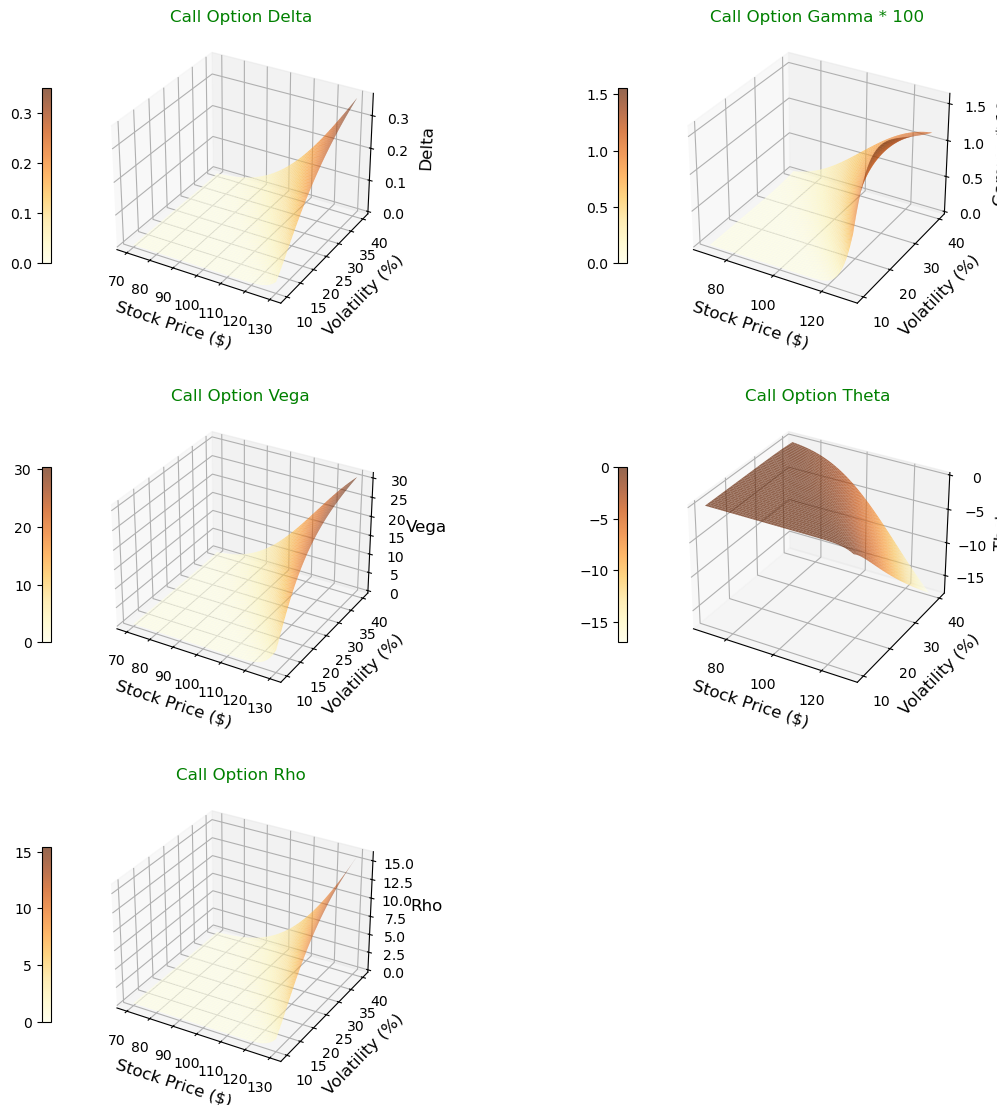

In [321]:
greeks_3D_plots(K=150, T=0.4, r=0.05, y=0, option="Call") 

****************************************************************************************************
Greeks for the Put option as a function of the Stock Price and Volatility
****************************************************************************************************


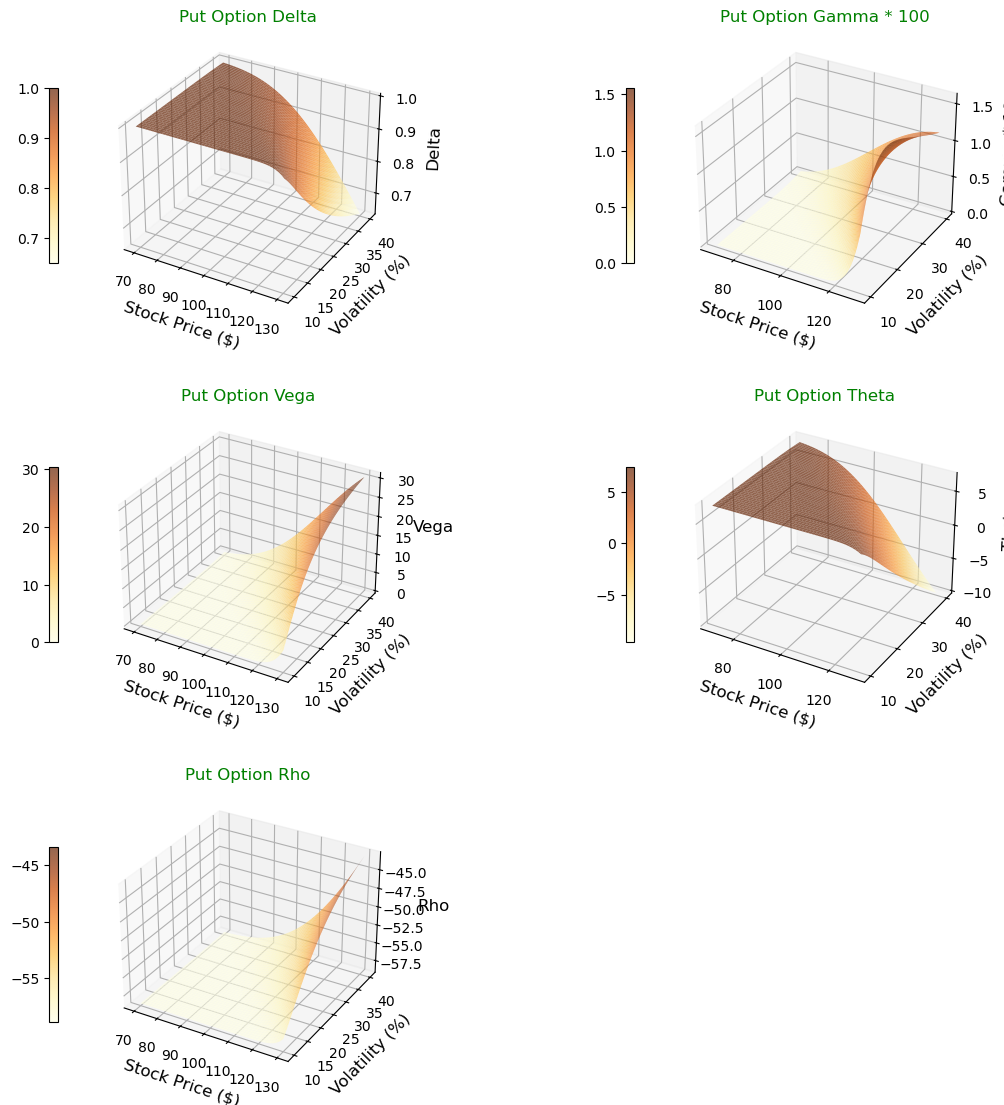

In [323]:
greeks_3D_plots(K=150, T=0.4, r=0.05, y=0, option="Put") 